# Support Vector Machine (SVM) 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Set Style
# sns.set_style('darkgrid')
# sns.set_style('dark')
# sns.set_style('whitegrid')
# sns.set_style('white')
sns.set_style('ticks')

## Iris Dataset

In [6]:
df = sns.load_dataset('iris')
# df.head()
# df.tail()
df.sample(6, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
56,6.3,3.3,4.7,1.6,versicolor


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
# แต่ละ Class มีจำนวน Samples เท่าใด
df.groupby('species').count()
# df.groupby('species').sepal_length.count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [10]:
# Frequency of Species (target or class)
(label, count) = np.unique(df.species , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[['setosa' 50]
 ['versicolor' 50]
 ['virginica' 50]]


## Data Visualization

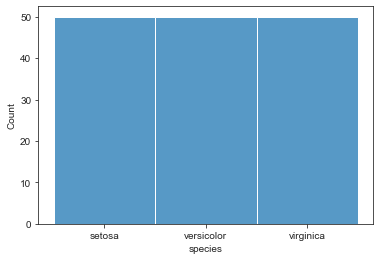

In [11]:
sns.histplot(data=df, x='species')
plt.show()

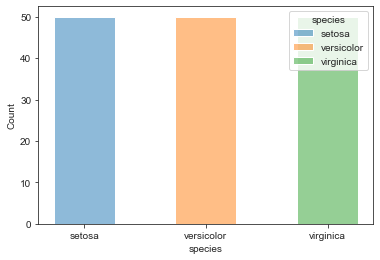

In [12]:
sns.histplot(data=df, x='species', hue='species', shrink=.5)
plt.show()

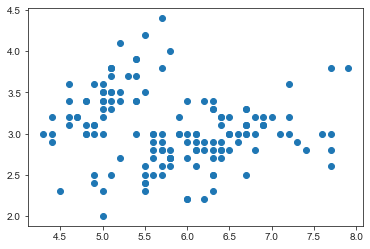

In [13]:
# Scatter plot by Matplotlib
plt.scatter(df.sepal_length, df.sepal_width)
plt.show()

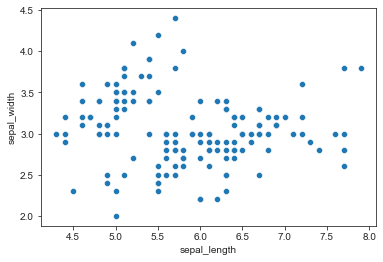

In [14]:
# Seaborn
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

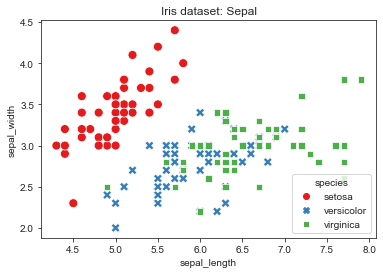

In [15]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                 hue='species', 
                 style='species', palette='Set1',
                 s=80)
plt.title('Iris dataset: Sepal')
plt.show()

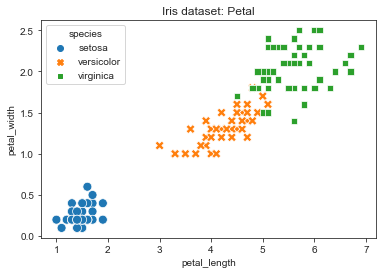

In [16]:
sns.scatterplot(data=df, x='petal_length', y='petal_width',
                 hue='species', style='species', s=80)
plt.title('Iris dataset: Petal')
plt.show()

## KDE 
A kernel density estimate (KDE) plot (for visualizing the distribution of observations in a dataset)

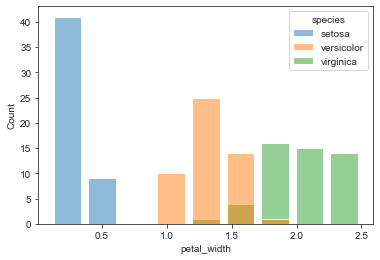

In [17]:
sns.histplot(data=df, x='petal_width', hue='species', shrink=.8)
plt.show()

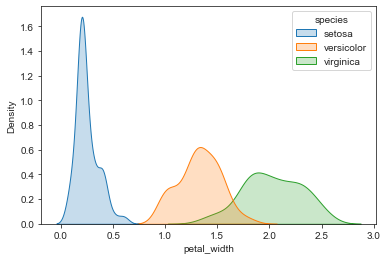

In [18]:
sns.kdeplot(data=df, x='petal_width', hue='species', shade=True)
plt.show()

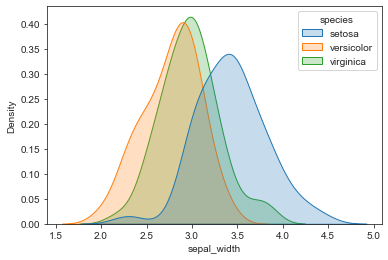

In [19]:
sns.kdeplot(data=df, x='sepal_width', hue='species', shade=True)
plt.show()

## Pairplot

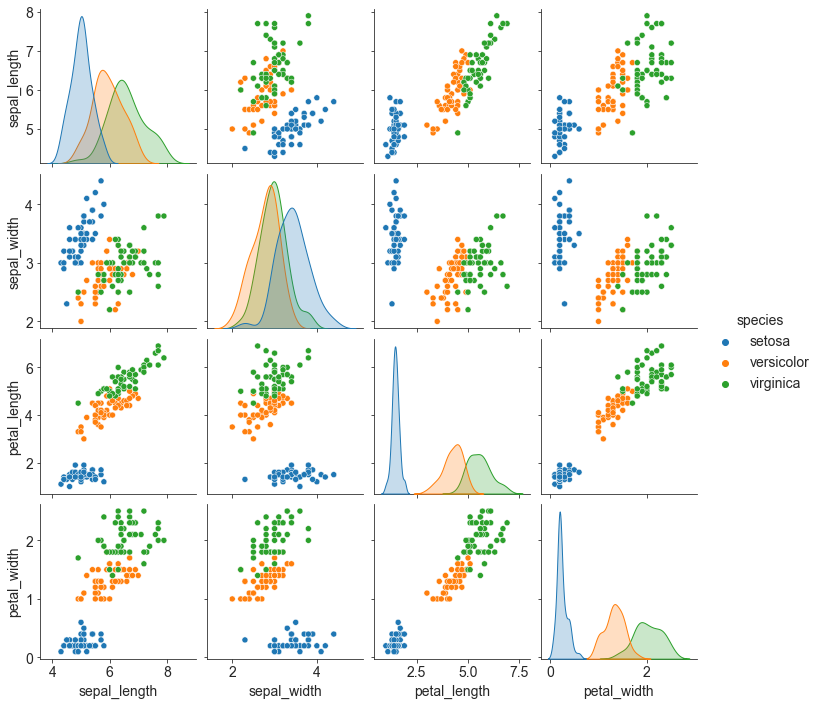

In [20]:
plt.rcParams.update({'font.size':14})
# sns.pairplot(df)
sns.pairplot(df, hue='species')
plt.show()

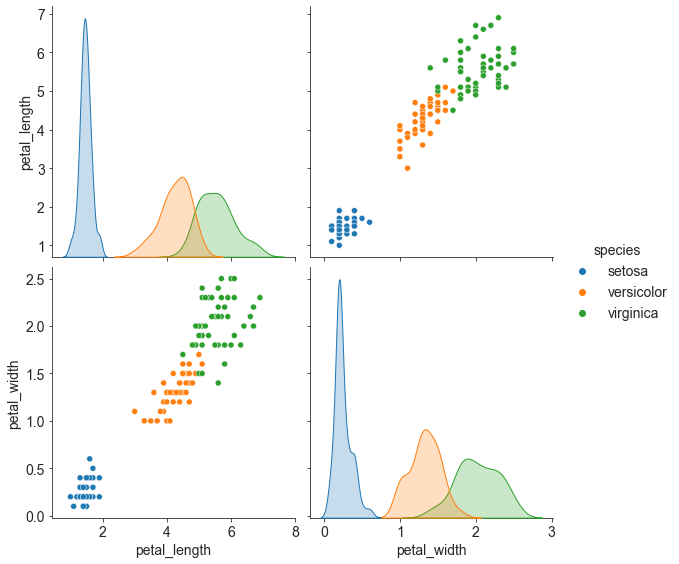

In [21]:
columns = ['petal_length', 'petal_width', 'species']
sns.pairplot(df[columns], hue='species', height=4)
plt.show()

## Prepare (เตรียม) X, y

In [22]:
X = df.drop(['species'], axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

## Label Encoding

In [28]:
# Label Encoding  (setosa-> 0,  versicolor->1 , virginica->2 )
y, class_names = pd.factorize(df.species)

class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [29]:
class_names[1]

'versicolor'

In [30]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df[50:55]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [33]:
y[50:55]

array([1, 1, 1, 1, 1], dtype=int64)

## Train-test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)  

In [35]:
X_train.shape , X_test.shape

((105, 4), (45, 4))

In [36]:
# Frequency of the Test set (target or class)
(label, count) = np.unique(y_test , return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[[ 0 13]
 [ 1 18]
 [ 2 14]]


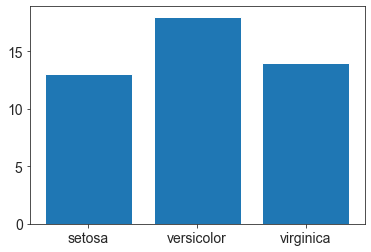

In [37]:
plt.bar(freq[:,0], freq[:,1])
plt.xticks(np.arange(3), class_names)  # Set text labels.
plt.show()

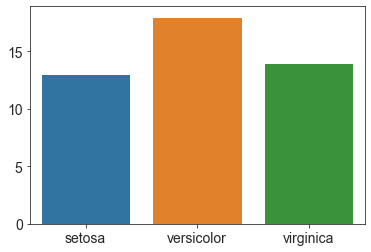

In [38]:
sns.barplot(x=freq[:,0], y=freq[:,1])
plt.xticks(np.arange(3), class_names)
plt.show()

In [39]:
X_train[:5]

,sepal_length,sepal_width,petal_length,petal_width
2,4.7,3.2,1.3,0.2
5,5.4,3.9,1.7,0.4
49,5.0,3.3,1.4,0.2
113,5.7,2.5,5.0,2.0
44,5.1,3.8,1.9,0.4


In [40]:
y_train[:5]

array([0, 0, 0, 2, 0], dtype=int64)

# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # maxdepth=3

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
model.feature_importances_

array([0.        , 0.01908397, 0.52381097, 0.45710506])

## Tree

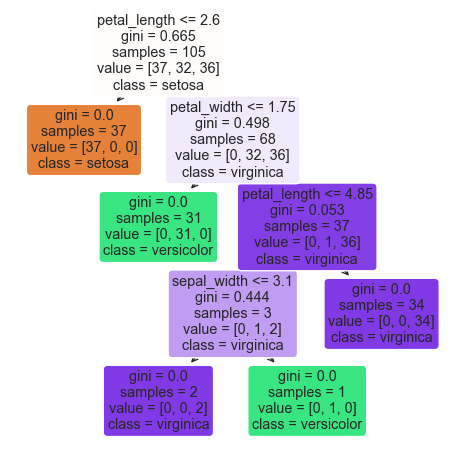

In [43]:
from sklearn.tree import plot_tree

data_feature_names = X.columns # enc_columns #

plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=96)
plot_tree(model, 
         filled=True, rounded=True,
         feature_names=data_feature_names,  
         class_names=class_names)

plt.show()

## Evaluation

In [44]:
score = model.score(X_test, y_test)
print('Score =', score.round(3))

Score = 0.889


In [45]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

print('Score -> {:.3f}' . format(model.score(X_test, y_test)))
print('Accuracy Score: ',accuracy_score(y_test, y_pred).round(3))

# print(classification_report(y_test, y_pred))        # 0 1 2
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print(cm)

Score -> 0.889
Accuracy Score:  0.889
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.78      1.00      0.88        18
   virginica       1.00      0.64      0.78        14

    accuracy                           0.89        45
   macro avg       0.93      0.88      0.89        45
weighted avg       0.91      0.89      0.88        45

[[13  0  0]
 [ 0 18  0]
 [ 0  5  9]]


## Confusion Matrix Plot

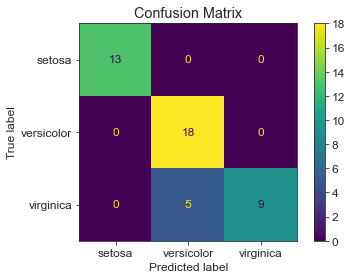

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot() # cmap='Pastel1'
plt.title('Confusion Matrix')
plt.show()

## Miss-classification (ผิดพลาด)

In [47]:
y_pred = model.predict(X_test)

In [48]:
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False]

,y_test,y_pred,result
3,2,1,False
12,2,1,False
29,2,1,False
35,2,1,False
41,2,1,False


In [49]:
print("Miss-classification:", len(y_test[(y_test != y_pred)]) )

Miss-classification: 5


## Predict

In [50]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     # 
                  [6.1, 3.5, 3.9, 1.5],     # 
                  [6.7, 3.5, 6.3, 1.4]])    # 

y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
versicolor


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Plot Decision Regions 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


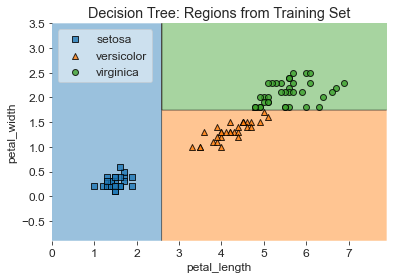

In [51]:
# from the Training set

from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_train), y_train, 
                      clf=model, feature_index=[2, 3],    # Petal Length-width
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Regions from Training Set')
plt.xlabel(df.columns[2]) 
plt.ylabel(df.columns[3])

plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


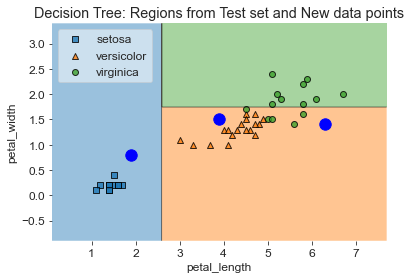

In [52]:
# จาก Test-set และ New data points (ที่ Predict)

from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test, 
                      clf=model, feature_index=[2, 3],  # Petal Length-Width  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Regions from Test set and New data points')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[2]) 
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

## Data Points

In [53]:
X_new

array([[4.2, 4. , 1.9, 0.8],
       [6.1, 3.5, 3.9, 1.5],
       [6.7, 3.5, 6.3, 1.4]])

In [54]:
# Sepal Length

spl = X_new[: ,0]   # Sepal Length and width
spl

array([4.2, 6.1, 6.7])

In [55]:
# Sepal width
spw = X_new[: ,1]
spw

array([4. , 3.5, 3.5])

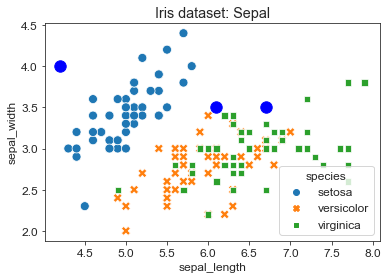

In [56]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width',
                 hue='species', style='species', s=80)

plt.scatter(spl, spw, marker='o', s=130, c='b')

plt.title('Iris dataset: Sepal')
plt.show()

In [57]:
# Petal Length
ptl = X_new[:,2]
ptl


array([1.9, 3.9, 6.3])

In [58]:
# Petal Width
ptw =  X_new[:,3]
ptw

array([0.8, 1.5, 1.4])

In [59]:
X_new

array([[4.2, 4. , 1.9, 0.8],
       [6.1, 3.5, 3.9, 1.5],
       [6.7, 3.5, 6.3, 1.4]])

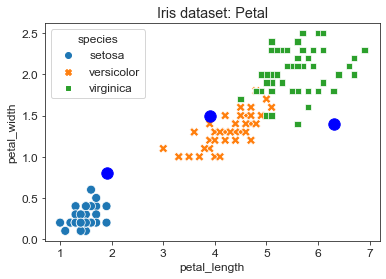

In [60]:
sns.scatterplot(data=df, x='petal_length', y='petal_width',
                 hue='species', style='species', s=80)

plt.scatter(ptl, ptw, marker='o', s=130, c='b')

plt.title('Iris dataset: Petal')
plt.show()

# SVM

In [61]:
from sklearn.svm import SVC

model = SVC(kernel='linear') 
# model = SVC(kernel='rbf')     # default

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=20)  

model.fit(X_train, y_train)

SVC(kernel='linear')

## Evaluation

In [62]:
y_pred = model.predict(X_test)

print('Score: {:.4f}' . format(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred, target_names=class_names))
print(confusion_matrix(y_test, y_pred))

Score: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92        18
   virginica       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]


## Predict

In [63]:
y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Confusion Matrix

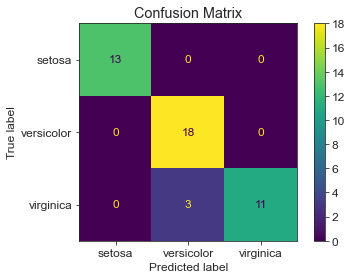

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

plt.rcParams.update({'font.size':12})
# labels = df.species.unique() # 

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot() # cmap='Pastel1'
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


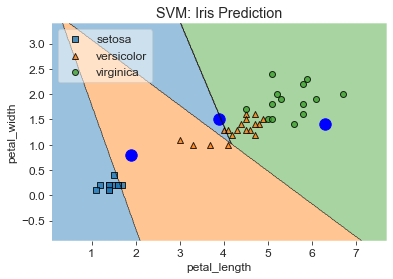

In [65]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test, 
                      clf=model, feature_index=[2, 3],  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

# plt.xticks([])
# plt.yticks([])
plt.xlabel(df.columns[2]) 
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


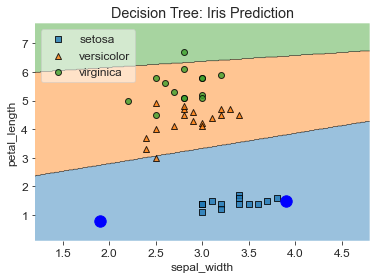

In [66]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_test), y_test, 
                      clf=model, feature_index=[1, 2],  
                      filler_feature_values={0: value, 3: value},
                      filler_feature_ranges={0: width, 3: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[1]) 
plt.ylabel(df.columns[2])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


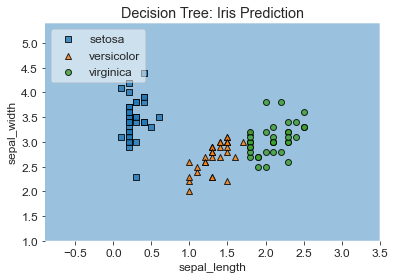

In [67]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(X_train), y_train, 
                      clf=model, feature_index=[3, 1],  
                      filler_feature_values={0: value, 2: value},
                      filler_feature_ranges={0: width, 2: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[0]) 
plt.ylabel(df.columns[1])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

# PCA
เปลี่ยน 4 features -> 2 features เพื่อ plot x-y graph

In [68]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [69]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_pca, y, test_size=0.3, random_state=20) 

In [70]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

## Model

In [71]:
# model = SVC(kernel='linear')
model = SVC(kernel='rbf')           # default

model.fit(X_train, y_train)

SVC()

In [72]:
y_pred = model.predict(X_test)
print('Score: {:.4f}' . format(accuracy_score(y_test, y_pred)))

Score: 0.9556


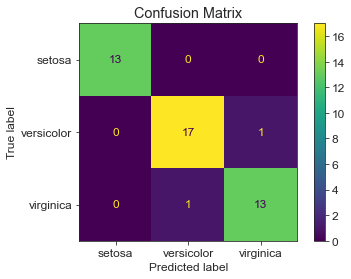

In [73]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot() # cmap='Pastel1'
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

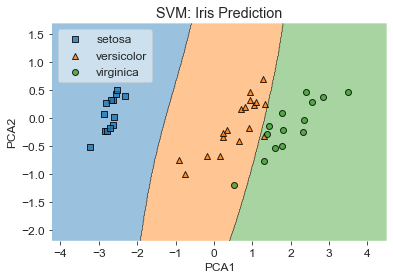

In [74]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test, 
                      clf=model, 
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()

In [75]:
X_new_pca = pca.transform(X_new)
X_new_pca

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-2.40832599, -0.03842687],
       [ 0.28471344,  0.44442903],
       [ 2.52172593,  0.42983601]])

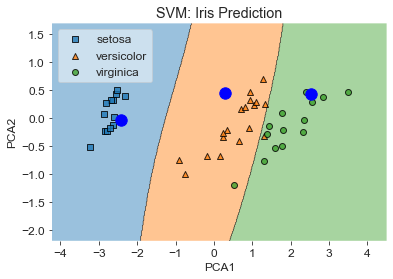

In [76]:
from mlxtend.plotting import plot_decision_regions

ax = plot_decision_regions(np.array(X_test), y_test, 
                      clf=model, 
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

plt.xticks()
plt.yticks()
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.scatter(X_new_pca[:,0], X_new_pca[:,1], marker='o', s=130, c='b')
plt.show()

## Predict

In [77]:
y_pred = model.predict(X_new_pca)
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


# Cross Validation

In [78]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear') # 

cvs = cross_val_score(model, X, y, cv=5)  # no need to use model.fit
print('cross val scores {}'.format(cvs.round(2)))
print('Average (%) = {:.2f}' .format(cvs.mean() * 100 ))

cross val scores [0.97 1.   0.97 0.97 1.  ]
Average (%) = 98.00


In [79]:
model.fit(X, y)

SVC(kernel='linear')

In [80]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     # setosa
                  [6.1, 3.5, 3.9, 1.5],     # versicolor
                  [6.7, 3.5, 6.3, 1.4]])    # 

y_pred = model.predict(X_new)
y_pred
# print(class_names[y_pred][0])
for i in y_pred:
    print(class_names[i])

setosa
versicolor
virginica


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
